### Github
**Only run this on first setup**

In [4]:
!git config --global user.email "aldyjonkunimen@gmail.com"
!git config --global user.name "AldyHermawan"

In [5]:
%cd /content/gdrive/MyDrive/DataMining/11181051_Aldy_DM_IF-ITK/
!git add .
!git status
!git commit -m "Dataset"

/content/gdrive/MyDrive/DataMining/11181051_Aldy_DM_IF-ITK
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   DataMining_Quiz_IrisClassification.ipynb

[master 6f2961a] Dataset
 1 file changed, 1 insertion(+)
 create mode 100644 DataMining_Quiz_IrisClassification.ipynb


In [6]:
!git push -u origin master

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 2.98 KiB | 610.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To https://github.com/aldyhermawan1/11181051_Aldy_DM_IF-ITK.git
   25645f3..6f2961a  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


### Google Drive Setup

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Changing Working Directory

In [2]:
%cd /content/gdrive/MyDrive/DataMining/11181051_Aldy_DM_IF-ITK/

/content/gdrive/MyDrive/DataMining/11181051_Aldy_DM_IF-ITK


### Importing Libraries

In [3]:
import numpy
import pandas
import seaborn
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Loading Data

In [4]:
dataset = pandas.read_csv('IRIS.csv')
iris = dataset.copy()

### Data Visualization

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Text(0.5, 1.0, 'Distribusi perbedaan kelopak')

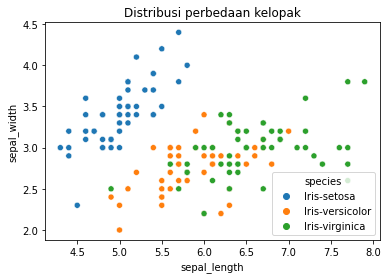

In [8]:
seaborn.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species).set_title("Distribusi perbedaan kelopak")

Text(0.5, 1.0, 'Distribusi perbedaan daun bunga')

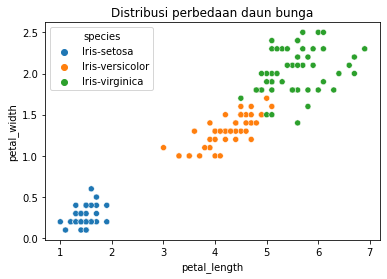

In [9]:
seaborn.scatterplot(x=iris.petal_length, y=iris.petal_width, hue=iris.species).set_title("Distribusi perbedaan daun bunga")

### Label Encoding

In [10]:
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
99,5.7,2.8,4.1,1.3,1
113,5.7,2.5,5.0,2.0,2
21,5.1,3.7,1.5,0.4,0
140,6.7,3.1,5.6,2.4,2
88,5.6,3.0,4.1,1.3,1
89,5.5,2.5,4.0,1.3,1
56,6.3,3.3,4.7,1.6,1
38,4.4,3.0,1.3,0.2,0
31,5.4,3.4,1.5,0.4,0
11,4.8,3.4,1.6,0.2,0


### Setting X and Y

In [11]:
x = iris.drop('species', axis=1)
y = iris.species

x.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
34,4.9,3.1,1.5,0.1
64,5.6,2.9,3.6,1.3
75,6.6,3.0,4.4,1.4
102,7.1,3.0,5.9,2.1
45,4.8,3.0,1.4,0.3


### Splitting dataset to train and test

Memisahkan dataset menjadi 50% train dan 50% test

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=0)

print("Train data")
print(x_train)
print("\n===============================================================\n")
print("Test data")
print(x_test)

Train data
     sepal_length  sepal_width  petal_length  petal_width
3             4.6          3.1           1.5          0.2
149           5.9          3.0           5.1          1.8
98            5.1          2.5           3.0          1.1
6             4.6          3.4           1.4          0.3
68            6.2          2.2           4.5          1.5
..            ...          ...           ...          ...
9             4.9          3.1           1.5          0.1
103           6.3          2.9           5.6          1.8
67            5.8          2.7           4.1          1.0
117           7.7          3.8           6.7          2.2
47            4.6          3.2           1.4          0.2

[75 rows x 4 columns]


Test data
     sepal_length  sepal_width  petal_length  petal_width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3         

### Classification Model

#### Decision Tree

In [13]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred_tree = tree_clf.predict(x_test)

print("Classification Report")
print(classification_report(y_test, y_pred_tree))
print("\n\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_tree))
print("\n\nAccuration = " + "{:.1%}".format(accuracy_score(y_pred_tree, y_test)))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Confusion Matrix
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


Accuration = 96.0%


#### Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

nb_clf =  GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred_nb = nb_clf.predict(x_test)

print("Classification Report")
print(classification_report(y_test, y_pred_nb))
print("\n\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred_nb))
print("\n\nAccuration = " + "{:.1%}".format(accuracy_score(y_pred_nb, y_test)))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        30
           2       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



Confusion Matrix
[[21  0  0]
 [ 0 30  0]
 [ 0  4 20]]


Accuration = 94.7%
